In [40]:
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
import json

def load_data(file_name, head=10000):
    count = 0
    data = []
    with open(file_name, 'r') as fin:
        for line in fin:
            d = json.loads(line)
            count += 1
            data.append(d)
            
            if head is not None and count >= head:
                break
    return data


In [124]:
book_data = load_data("./data/archive/goodreads_books.json")
authors_data = load_data("./data/archive/goodreads_book_authors.json")
reviews_data = load_data("./data/archive/goodreads_reviews_dedup.json")
genres_data = load_data("./data/archive/goodreads_book_genres_initial.json")
works_data = load_data("./data/archive/goodreads_book_works.json")
series_data = load_data("./data/archive/goodreads_book_series.json")

In [127]:
book_df = pd.DataFrame(book_data)
authors_df = pd.DataFrame(authors_data)
reviews_df = pd.DataFrame(reviews_data)
genres_df = pd.DataFrame(genres_data)
works_df = pd.DataFrame(works_data)
series_df = pd.DataFrame(series_data)
book_user_df = pd.read_csv("./data/archive/goodreads.csv", nrows=10000)

In [135]:
book_user_df.columns

Index(['user_id', 'book_id', 'is_read', 'rating', 'is_reviewed'], dtype='object')

In [136]:
def data_preprocessing_pipeline(data):
    print(data.isnull().sum())

    columns_to_check = ['average_rating', 'ratings_count', 'title', 'isbn', 'authors']
    columns_to_convert = ['text_reviews_count', 'average_rating', 'publication_month', 'publication_year', 'ratings_count', 'num_pages']
    columns_to_drop = ['url', 'image_url']

    for column in columns_to_check:
        if column in data.columns:
            data.dropna(subset=[column], inplace=True)
    
    # Avoid list and dict for detect duplicates
    list_columns = [
        col for col in data.columns
        if any(not isinstance(val, list) and not isinstance(val, dict) for val in data[col])
    ]

    data = data.drop_duplicates(subset=list_columns, keep='first')

    # Convert data to numeric type
    for column in columns_to_convert:
        if column in data.columns:
            data[column] = pd.to_numeric(data[column], errors='coerce') 
    
    # Check if rating are in the correct range
    if 'average_rating' in data.columns:
        data = data[(data['average_rating'] >= 1) & (data['average_rating'] <= 5)]

    # Drop unnecessary columns
    data.drop(columns=columns_to_drop, inplace=True, errors='ignore')
    

In [44]:
book_df.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,0312853122,1,[],US,,"[{'count': '3', 'name': 'to-read'}, {'count': ...",,false,4.00,,...,9,,1984,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film
1,0743509986,6,[],US,,"[{'count': '2634', 'name': 'to-read'}, {'count...",,false,3.23,B000FC0PBC,...,10,Abridged,2001,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,1333909,10,1323437,Good Harbor,Good Harbor
2,,7,[189911],US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,false,4.03,,...,,Book Club Edition,1987,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ..."
3,0743294297,3282,[],US,eng,"[{'count': '7615', 'name': 'to-read'}, {'count...",,false,3.49,B002ENBLOK,...,7,,2009,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,6066819,51184,6243154,Best Friends Forever,Best Friends Forever
4,0850308712,5,[],US,,"[{'count': '32', 'name': 'to-read'}, {'count':...",,false,3.40,,...,,,,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,287140,15,278577,Runic Astrology: Starcraft and Timekeeping in ...,Runic Astrology: Starcraft and Timekeeping in ...


In [137]:
data_preprocessing_pipeline(book_df)
data_preprocessing_pipeline(authors_df)
data_preprocessing_pipeline(reviews_df)
data_preprocessing_pipeline(genres_df)
data_preprocessing_pipeline(works_df)
data_preprocessing_pipeline(series_df)
data_preprocessing_pipeline(book_user_df)

isbn                    0
text_reviews_count      0
series                  0
country_code            0
language_code           0
popular_shelves         0
asin                    0
is_ebook                0
average_rating          0
kindle_asin             0
similar_books           0
description             0
format                  0
link                    0
authors                 0
publisher               0
num_pages               0
publication_day         0
isbn13                  0
publication_month       0
edition_information     0
publication_year        0
url                     0
image_url               0
book_id                 0
ratings_count           0
work_id                 0
title                   0
title_without_series    0
dtype: int64
average_rating        0
author_id             0
text_reviews_count    0
name                  0
ratings_count         0
dtype: int64
user_id         0
book_id         0
review_id       0
rating          0
review_text     0
date_added

<h3> Informações sobre autores </h3>

In [83]:
# Average rating
# TODO: use dataframe directly here instead of converting json list

avg_author_rating = 0.0
avg_author_reviews = 0.0

for author in authors_data:
    avg_author_rating += float(author['average_rating'])
    avg_author_reviews += float(author['text_reviews_count'])

avg_author_rating /= 10000
avg_author_reviews /= 10000


authors_by_rating_count = [(author['name'], int(author['ratings_count'])) for author in authors_data]
authors_by_average_rating = [(author['name'], float(author['average_rating'])) for author in authors_data if float(author['ratings_count']) >= 100]

df_rating_count = pd.DataFrame(authors_by_rating_count, columns=['name', 'ratings_count'])
df_average_rating = pd.DataFrame(authors_by_average_rating, columns=['name', 'average_rating'])

df_rating_count_sorted = df_rating_count.sort_values(by='ratings_count', ascending=False)
df_average_rating_sorted = df_average_rating.sort_values(by='average_rating', ascending=False)

Text(0, 0.5, 'Amount of reviews')

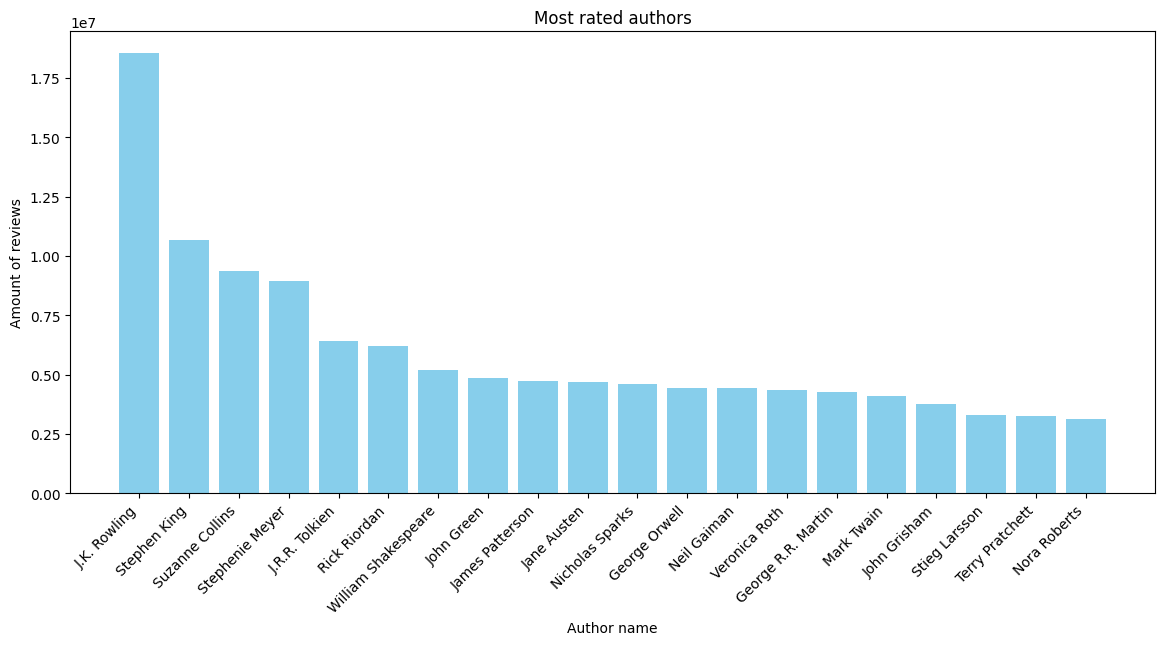

In [78]:
# Most rated authors

plt.figure(figsize=(14, 6))

plt.bar(df_rating_count_sorted['name'][0:20], df_rating_count_sorted['ratings_count'][0:20], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Most rated authors")
plt.xlabel("Author name")
plt.ylabel("Amount of reviews")

Text(0, 0.5, 'Amount of reviews')

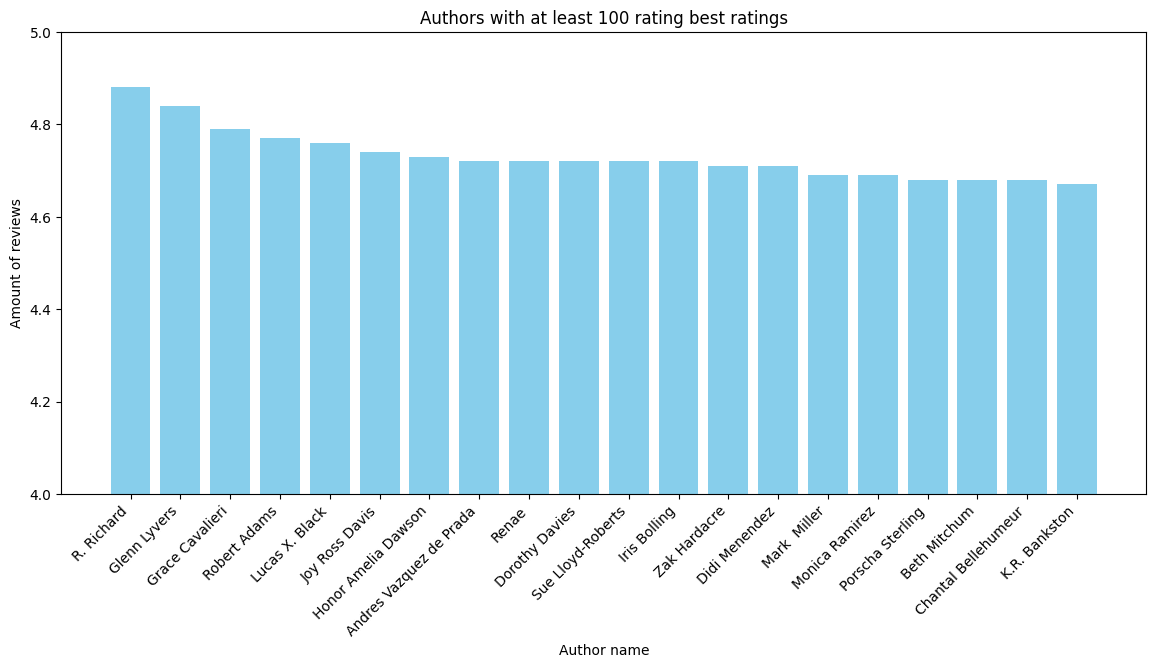

In [84]:
# Greatest ratings for players with at least 100 ratings

plt.figure(figsize=(14, 6))
plt.bar(df_average_rating_sorted['name'][0:20], df_average_rating_sorted['average_rating'][0:20], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylim(4,5)
plt.title("Authors with at least 100 rating best ratings")
plt.xlabel("Author name")
plt.ylabel("Amount of reviews")

In [52]:
## All authors average rating

print(avg_author_rating)

3.8793199999999923


In [53]:
# Average number of reviews per author

print(avg_author_reviews)

2714.5433


<h3> Books info </h3>

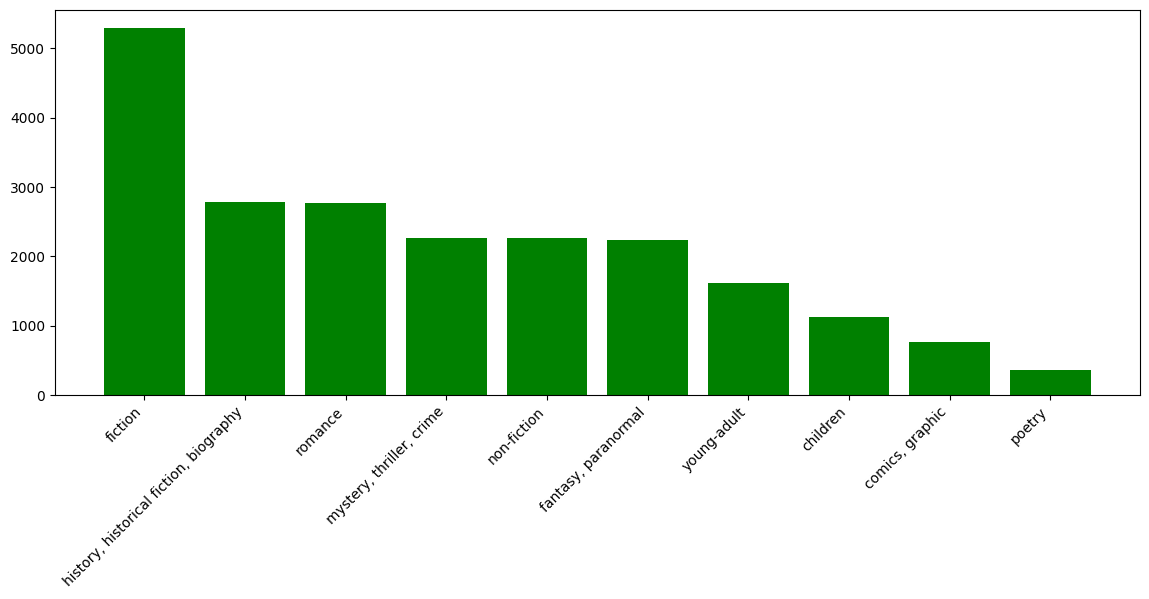

In [54]:
total_genres = {}

def get_genres(row):
    genre_list = [genre.strip() for genre in row['genres']]
    return genre_list

for idx, row in genres_df.iterrows():
    genres = get_genres(row)

    for genre in genres:
        if genre in total_genres:
            total_genres[genre] += 1
        else:
            total_genres[genre] = 1

sorted_genres = dict(sorted(total_genres.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(14, 5))
plt.bar(sorted_genres.keys(), sorted_genres.values(), color='g')
plt.xticks(rotation=45, ha='right')
plt.show()

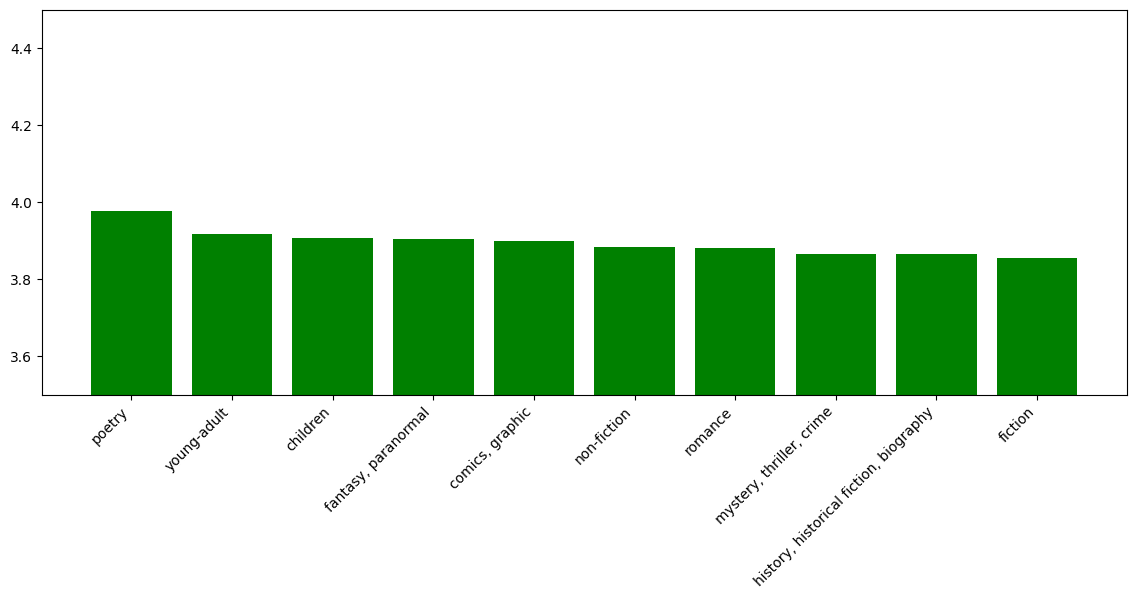

In [55]:
genres_rating = {}

for idx, row in genres_df.iterrows():
    book_id = row['book_id']
    genres = get_genres(row)  
    book_rating = book_df[book_df['book_id'] == book_id]['average_rating'].values[0]

    for genre in genres:
        if genre in genres_rating:
            genres_rating[genre] += float(book_rating)
        else:
            genres_rating[genre] = float(book_rating)


for genre, rating in genres_rating.items():
    genres_rating[genre] /= total_genres[genre]

sorted_genres = dict(sorted(genres_rating.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(14, 5))
plt.ylim(3.5, 4.5)
plt.bar(sorted_genres.keys(), sorted_genres.values(), color='g')
plt.xticks(rotation=45, ha='right')
plt.show()

In [56]:
# Livros mais bem avaliados
book_df['ratings_count'] = pd.to_numeric(book_df['ratings_count'])
books_1000_ratings = book_df[book_df['ratings_count'] >= 1000]
books_1000_ratings_best = books_1000_ratings.sort_values(by='average_rating', ascending=False)
books_1000_ratings_worst = books_1000_ratings.sort_values(by='average_rating', ascending=True)

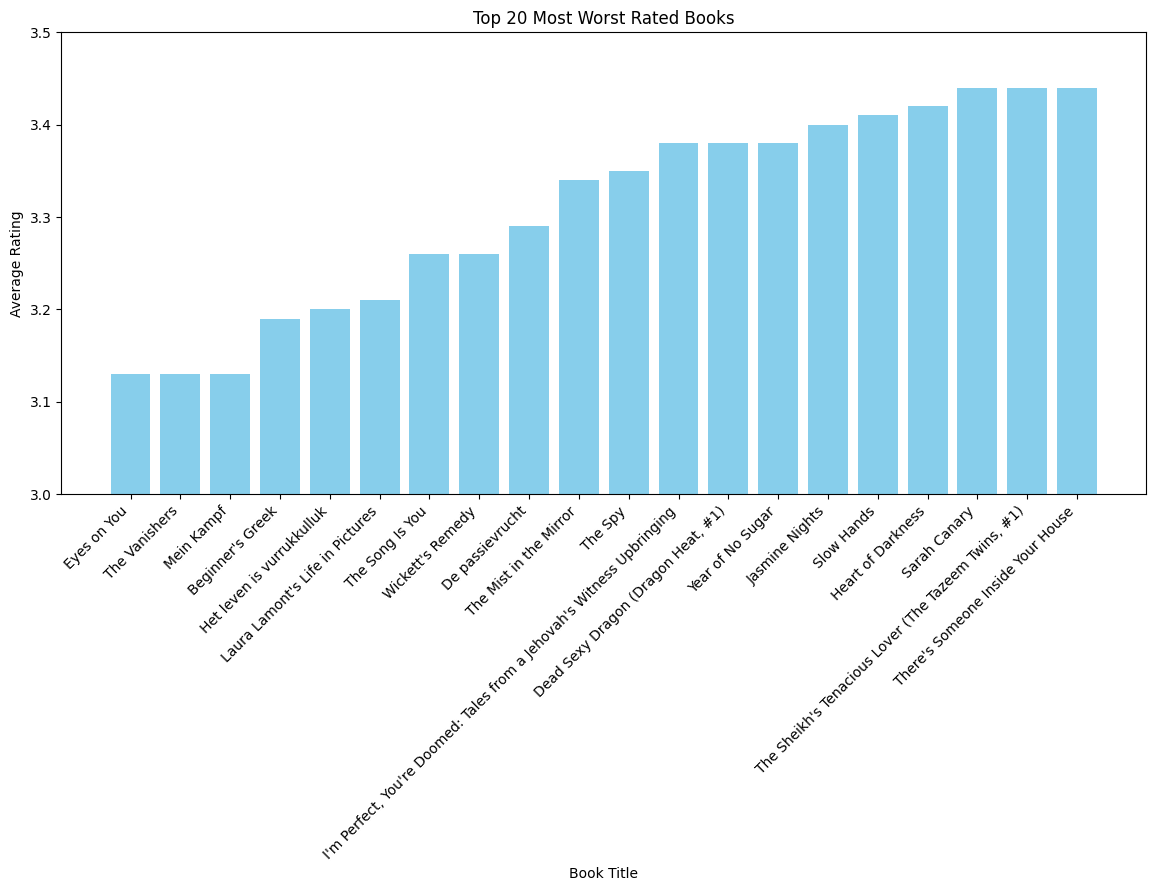

In [60]:
plt.figure(figsize=(14, 6)) 
plt.bar(books_1000_ratings_worst['title'][0:20], books_1000_ratings_worst['average_rating'][0:20], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Most Worst Rated Books")
plt.xlabel("Book Title")
plt.ylim(3.0, 3.5)
plt.ylabel("Average Rating")
plt.show()

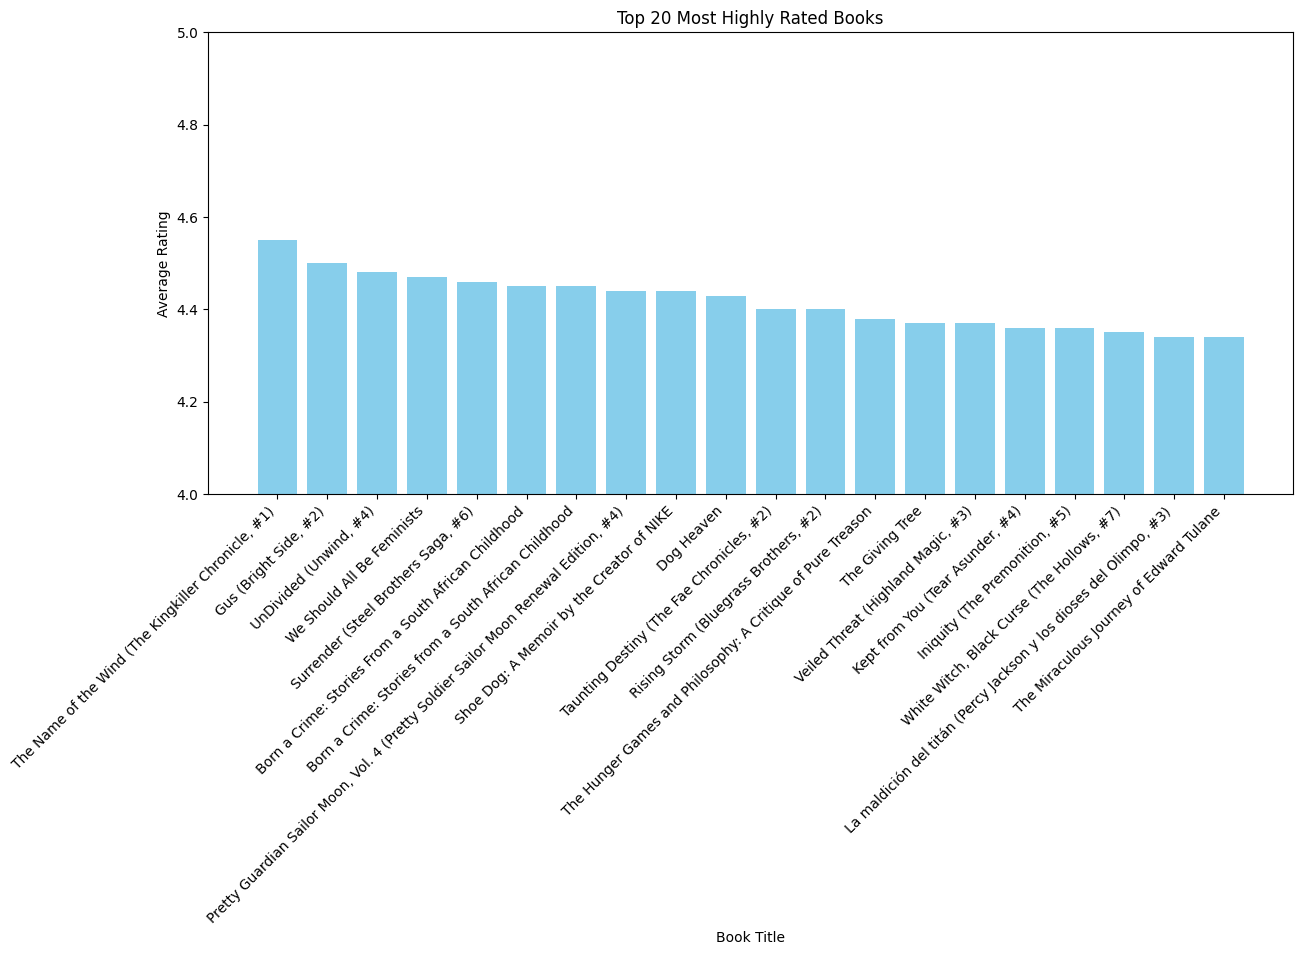

In [61]:
# CORRIGIR DEPOIS

plt.figure(figsize=(14, 6))
plt.bar(books_1000_ratings_best['title'][0:20], books_1000_ratings_best['average_rating'][0:20], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Most Highly Rated Books")
plt.ylim(4.0, 5.0)
plt.xlabel("Book Title")
plt.ylabel("Average Rating")
plt.show()